#Import Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

In [2]:
!pip install pytorch-tabnet

In [3]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [4]:
names=['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data', names=names)

In [5]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [7]:
df.replace('?',np.nan,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    278 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


Remove Nan

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        277 non-null    object
 1   age          277 non-null    object
 2   menopause    277 non-null    object
 3   tumor-size   277 non-null    object
 4   inv-nodes    277 non-null    object
 5   node-caps    277 non-null    object
 6   deg-malig    277 non-null    int64 
 7   breast       277 non-null    object
 8   breast-quad  277 non-null    object
 9   irradiat     277 non-null    object
dtypes: int64(1), object(9)
memory usage: 23.8+ KB


#Preprocess Data

In [15]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [16]:
col=list(df.columns)
le = preprocessing.LabelEncoder()
for i in col:
  df[i]=le.fit_transform(df[i])
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,0,2,0,1,0
1,0,2,2,3,0,0,1,1,4,0
2,0,2,2,3,0,0,1,0,1,0
3,0,4,0,2,0,0,1,1,2,0
4,0,2,2,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,0,1,0,2,0
282,1,1,2,3,0,0,2,0,2,1
283,1,4,0,3,0,0,0,1,2,0
284,1,2,0,5,4,0,2,0,1,0


#Model 1


In [51]:
x=df.loc[:, df.columns != 'Class'].to_numpy()
y=df['Class'].to_numpy()
xtrn, xval, ytrn, yval = train_test_split(x, y, test_size=0.3, random_state=22)
#xval, xtst, yval, ytst = train_test_split(xval, yval, test_size=0.50, random_state=22)

##Base Model with single node neural network

In [52]:
layer=tf.keras.layers.Dense(1,activation='sigmoid')
inputs = tf.keras.Input(shape=(9,))
outputs=layer(inputs)

model=tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [53]:
tf.keras.backend.clear_session()
loss=tf.keras.losses.BinaryCrossentropy(
    from_logits=True, label_smoothing=0.0, axis=-1)
model.compile(optimizer='adam',loss=loss,metrics=['accuracy','AUC'])
model.fit(xtrn,ytrn,batch_size=128,epochs=1000)

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 1s 7ms/step - loss: 1.0237 - accuracy: 0.4922 - auc: 0.4273
Epoch 2/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.0198 - accuracy: 0.4922 - auc: 0.4274
Epoch 3/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.0150 - accuracy: 0.4922 - auc: 0.4272
Epoch 4/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.0110 - accuracy: 0.5026 - auc: 0.4272
Epoch 5/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.0067 - accuracy: 0.5026 - auc: 0.4268
Epoch 6/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.0022 - accuracy: 0.5078 - auc: 0.4272
Epoch 7/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.9983 - accuracy: 0.5078 - auc: 0.4270
Epoch 8/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.9937 - accuracy: 0.5026 - auc: 0.4272
Epoch 9/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.9899 - accuracy: 0.5026 - auc: 0.4272
Epoch

In [54]:
def eva(model,xtst,ytst):
  l,acc,auc=model.evaluate(xtst,ytst,verbose=False)
  print('Performance:\nAccuracy: {}     AUC: {}\n\nConfusion Matrix:'.format(acc,auc))
  ypred=model.predict(xtst)
  ypred=ypred.reshape(ypred.shape[0])
  ypred=np.where(ypred >= 0.5, 1,0)
  ConfusionMatrixDisplay.from_predictions(ytst, ypred)
  plt.show()


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Performance:
Accuracy: 0.738095223903656     AUC: 0.7178683280944824

Confusion Matrix:


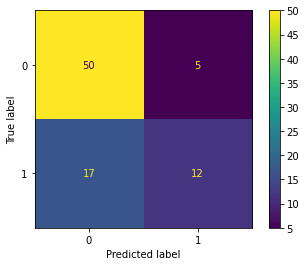

In [55]:
eva(model,xval,yval)

##  Deep Neural Network

Play with the parameters and fine tune it

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Model Params
No of Layers:3   Nodes:[5, 3, 1]
Performance:
Accuracy: 0.6904761791229248     AUC: 0.7589341402053833

Confusion Matrix:


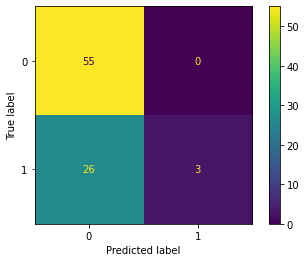

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Model Params
No of Layers:4   Nodes:[32, 16, 8, 1]
Performance:
Accuracy: 0.773809552192688     AUC: 0.7927899360656738

Confusion Matrix:


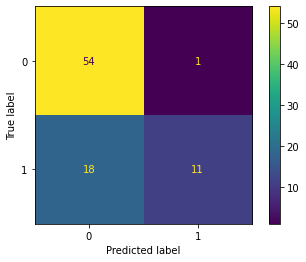

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Model Params
No of Layers:3   Nodes:[16, 4, 1]
Performance:
Accuracy: 0.773809552192688     AUC: 0.7764890193939209

Confusion Matrix:


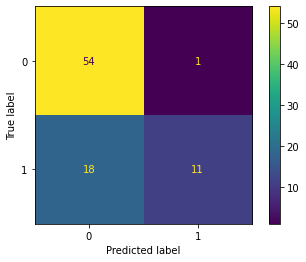

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Model Params
No of Layers:3   Nodes:[64, 16, 1]
Performance:
Accuracy: 0.773809552192688     AUC: 0.7714732885360718

Confusion Matrix:


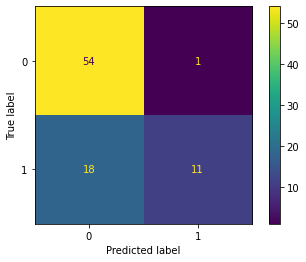

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Model Params
No of Layers:4   Nodes:[256, 64, 4, 1]
Performance:
Accuracy: 0.761904776096344     AUC: 0.7413793206214905

Confusion Matrix:


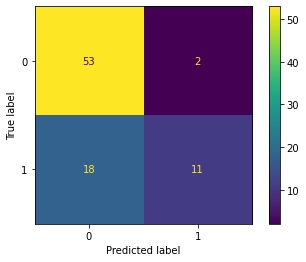

In [56]:
params=[[5,3,1],[32,16,8,1],[16,4,1],[64,16,1],[256,64,4,1]]
loss=tf.keras.losses.BinaryCrossentropy(
    from_logits=True, label_smoothing=0.0, axis=-1)
for p in params:
  tf.keras.backend.clear_session()
  n=len(p)
  inputs = tf.keras.Input(shape=(9,))
  for i in range(n-1):
    if i==0:
      l=tf.keras.layers.Dense(p[0],activation='sigmoid')(inputs)
    l=tf.keras.layers.Dense(p[i],activation='sigmoid')(l)
  outputs=tf.keras.layers.Dense(1,activation='sigmoid')(l)
  model=tf.keras.Model(inputs=inputs, outputs=outputs)

  model.compile(optimizer='adam',loss=loss,metrics=['accuracy','AUC'])
  h=model.fit(xtrn,ytrn,batch_size=128,epochs=1000,verbose=False)
  print('Model Params\nNo of Layers:{}   Nodes:{}'.format(n,p))
  eva(model,xval,yval)
  print('\n\n')


# Model 2

In [57]:
x=df.loc[:, df.columns != 'Class'].to_numpy()
y=df['Class'].to_numpy()

xtrn, xval, ytrn, yval = train_test_split(x, y, test_size=0.30, random_state=22)
#xval, xtst, yval, ytst = train_test_split(xval, yval, test_size=0.50, random_state=22)

In [58]:
clf = TabNetClassifier(
                      scheduler_params={"step_size":50, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

Device used : cpu


In [59]:
clf.fit(
    xtrn,ytrn,
    eval_set=[(xtrn, ytrn), (xval, yval)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=1000 , patience=50,
)

epoch 0  | loss: 0.9845  | train_auc: 0.5847  | train_accuracy: 0.73057 | valid_auc: 0.57304 | valid_accuracy: 0.66667 |  0:00:00s
epoch 1  | loss: 0.6573  | train_auc: 0.50757 | train_accuracy: 0.71503 | valid_auc: 0.52978 | valid_accuracy: 0.61905 |  0:00:00s
epoch 2  | loss: 0.54725 | train_auc: 0.42594 | train_accuracy: 0.62694 | valid_auc: 0.47962 | valid_accuracy: 0.57143 |  0:00:00s
epoch 3  | loss: 0.49384 | train_auc: 0.45322 | train_accuracy: 0.59585 | valid_auc: 0.51285 | valid_accuracy: 0.53571 |  0:00:00s
epoch 4  | loss: 0.52595 | train_auc: 0.48432 | train_accuracy: 0.53886 | valid_auc: 0.53856 | valid_accuracy: 0.57143 |  0:00:00s
epoch 5  | loss: 0.50595 | train_auc: 0.48882 | train_accuracy: 0.54922 | valid_auc: 0.56332 | valid_accuracy: 0.60714 |  0:00:00s
epoch 6  | loss: 0.45269 | train_auc: 0.512   | train_accuracy: 0.63212 | valid_auc: 0.60345 | valid_accuracy: 0.66667 |  0:00:00s
epoch 7  | loss: 0.43066 | train_auc: 0.54692 | train_accuracy: 0.68394 | valid_auc

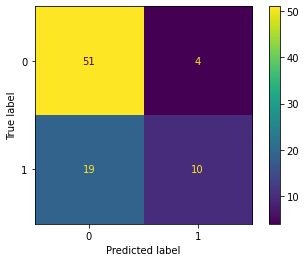

In [60]:
preds = clf.predict(xval)
ConfusionMatrixDisplay.from_predictions(yval, preds)

# Consumption of best model

In [63]:
loss=tf.keras.losses.BinaryCrossentropy(
    from_logits=True, label_smoothing=0.0, axis=-1)
p=[32, 16, 8, 1]
tf.keras.backend.clear_session()
n=len(p)
inputs = tf.keras.Input(shape=(9,))
for i in range(n-1):
  if i==0:
    l=tf.keras.layers.Dense(p[0],activation='sigmoid')(inputs)
  l=tf.keras.layers.Dense(p[i],activation='sigmoid')(l)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(l)
model=tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',loss=loss,metrics=['accuracy','AUC'])
h=model.fit(xtrn,ytrn,batch_size=128,epochs=1000,verbose=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Performance:
Accuracy: 0.7857142686843872     AUC: 0.7727272510528564

Confusion Matrix:


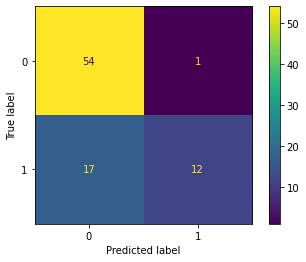

In [64]:
eva(model,xval,yval)

In [71]:
example=xval[10:15]

In [75]:
def predict(example):
  ypred=model.predict(example)
  ypred=ypred.reshape(ypred.shape[0])
  ypred=np.where(ypred >= 0.5, 1,0)
  k=1==ypred
  print(k)

In [76]:
predict(example)

[ True False False  True False]
